# DBA3701/DSC3214 Introduction to Optimization
## Individual Project

# TABLE OF CONTENTS

* [1. INTRODUCTION](#section-one)
    - [1.1 Objective and Motivation](#subsection-one-one)
    - [1.2 Problem Description](#subsection-one-two)
    

* [2. MODEL FORMULATION](#section-two)
    - [2.1 Sets](#subsection-two-one)
    - [2.2 Parameters](#subsection-two-two)
    - [2.3 Decision Variables](#subsection-two-three)
    - [2.4 Primary Objective Function & Constraints](#subsection-two-four)
    - [2.5 Secondary Objective Function & Constraints](#subsection-two-five)


* [3. SETUP](#section-three)
    - [3.1 Importing Packages](#subsection-four-one)
    - [3.2 Inputting Data](#subsection-four-two)


* [4. OPTIMIZATION MODEL](#section-four)
    - [4.1 Creating Initial Model](#subsection-four-one)
    - [4.2 Including Decision Variables](#subsection-four-two)
    - [4.3 Adding Constraints](#subsection-four-three)
    - [4.4 Defining Objective Functions](#subsection-four-four)
    - [4.5 Running Optimization Engine](#subsection-four-five)
    - [4.6 Running Checks on Optimization Engine](#subsection-four-six)


* [5. PROBLEM SOLUTION VISUALIZATION](#section-five)
    - [5.1 Slack Required in Optimal Solution](#subsection-five-one)
    - [5.2 Number of Shifts Worked for Each Worker](#subsection-five-two)
    - [5.3 Gantt Chart of Optimal Work Plan Schedule](#subsection-five-three)


* [6. ANALYSIS OF OPTIMZATION PROBLEM](#section-six)


* [7. CONCLUSION](#section-seven)

<a id="section-one"></a>
# 1. INTRODUCTION

This project notebook describes a workforce scheduling optimization problem that can be used for a variety of businesses that require employee scheduling. It is most commonly used in the services industry as their workers work in shifts and companies in this industry often employ part-time staff that are paid hourly.

The problem is formulated as a multi-objective mixed-integer-programming (MIP) model. The model is implemented using the Gurobi Python API and solved using the Gurobi Optimizer.

<a id="subsection-one-one"></a>
## 1.1 Objective and Motivation

Within the services industry, it's people are the most important asset as well as the largest source of costs. Therefore, it is important for these companies to properly allocate their workforce resources optimally. The allocation of workforce and scheduling of personnel deals with the arrangement of work schedules and assignment of personnel shifts. Doing this optimally will allow these companies to meet demand for the products and services that varies over time.

This scheduling problem is important for companies in the services industry who provide services by relying on workforce resources such as:

- Hospital Nurses
- Restaurant Staff
- Supermarket Workers
- Hospitality and Tourism Personnel
- Transport Service Staff (E.g. Airline crew, Uber Drivers, Bus Drivers)

<a id="subsection-one-two"></a>
## 1.2 Problem Description

IKEA is a megastore that designs and sells ready-to-assemble furniture, kitchen appliances and home accessories, among other useful goods. To keep their displays and shelves clean and presentable to customers, they employ a team of staff that work in shifts to maintain their stores and cater to customer enquiries. This service requires only one set of skills and there are a total of 8 registered workers that are contracted with IKEA. They all possess same set of skills and are assumed to have identical productivity. However, these workers have limited availibility and are only able to work on some of the days. 

A human resource manager of IKEA Tampines wishes to develop a workforce plan that can allocate manpower into a daily schedule for the next two weeks (with a 7-day work week). The store has currently contracted 8 workers that are fully employed. However, as the flow of customers into these stores fluctuate significantly with cyclical changes days, weeks and months, she has opted to employ part-time workers to fill in for periods of higher demand. If there is a lack of manpower for any particular day, IKEA may hire extra workers from an external agency to satisfy shift requirements. There is only one shift per workday and each workday may have different resource (worker) requirements.

In this problem, the head human resource manager in IKEA wishes to minimize the number of extra workers that she needs to hire in order to meet daily demand. And as a secondary objective, she wants to balance the workload of employed workers to ensure fairness.

<a id="section-two"></a>
# 2. MODEL FORMULATION

In this section, the components of the workforce scheduling optimization model will be defined and the key components of this complex decision problem will be formulated into an mathematical optimization problem. In later sections, these formulas will be utilized in mathematical programming which allows the Gurobi model to solve the mathematical optimization problem.

A mathematical optimization model has five components:
- Sets.
- Parameters.
- Decision variables.
- Constraints.
- Objective function(s).

<a id="subsection-two-one"></a>
## 2.1 Sets

$s \in \text{shifts}$: Index of shift $s$ within set of $\text{shifts}$.

$w \in workers$: Index of employed worker $w$ within set of all employed $workers$.

$availability= \{(w,s): w \in workers \; \text{is available for} \; s \in \text{shifts} \}$: This set determines if an employed worker  $w$ is available to work in shift $s$.

<a id="subsection-two-two"></a>
## 2.2 Parameters

### Inputted Parameters
$\text{shiftRequirements}(s) \in \mathbb{N}$: This parameter represents the number of workers required for each shift 
$s \in \text{shifts}$.

$pay(w) \in \mathbb{R^{+}}$: This parameter represents the salary per shift of each worker $w \in workers$. 

$relTol$: This parameter represents the relative tolerance. It allows the model to deviate from the values derived from the optimal objective function of the primary objective, when solving the optimization model for the secondary objective.

### Computed Parameters
These parameters are computed from the input parameters and/or from the optimization process.

$Opt(totSlack)$: This parameter is the minimum value of extra workers required to fill demand. 

<a id="subsection-two-three"></a>
## 2.3 Decision Variables

$x(w,s) \in \{0,1\}$: This variable equals 1 if worker $w \in workers$ is assigned to shift $s \in \text{shifts}$, 
and 0 otherwise.
This decision variable is defined over the $availability$ set.

$Slack(s) \geq 0$: This variable is the number of extra workers required to satisfy the requirements of shift $s$.

### Auxiliary Variables
Auxiliary variables are derived from the values of the decision variables.

$totSlack$: This variable counts the total number of extra workers required to satisfy the demand for employed workers.

$\text{totShifts}(w)$: This variable counts the total number of shifts worked by each worker $w \in workers$.

$\text{minShift}$: This variable determines the minimum number of shifts allocated to all workers. 

$\text{maxShift}$: This variable  determines the maximum number of shifts allocated to all workers.

<a id="subsection-two-four"></a>
## 2.4 Primary Objective Function and Constraints

### Objective Function
- **Primary objective:** The objective function is to minimize the number of extra workers required to meet demand. 

\begin{equation}
\text{Min} \quad totSlack
\tag{0}
\end{equation}

### Constraints

- **Shift requirements:**  All shift requirements must be satisfied. 

\begin{equation}
\sum_{w \: \in \: workers} x(w,s)  +  Slack(s) = \text{shiftRequirements}(s) \quad \forall \; s \in \text{shifts}
\tag{1}
\end{equation}

- **Temps:** Computes the total number of extra workers required for the two-week schedule.

\begin{equation}
\sum_{s \: \in \: \text{shifts}} Slack(s) =  totSlack 
\tag{2}
\end{equation}

- **Shifts:**  Computes the total number of shifts each worker works.

\begin{equation}
\sum_{s \: \in \: \text{shifts}} x(w,s)  = \text{totShifts}(w) \quad \forall \; w \in workers
\tag{3}
\end{equation}

- **Binary and non-negativity constraints:**

$$
x(w,s) \in \{0, 1 \}  \quad \forall \; (w,s) \in availability
$$

$$
Slack(s) \geq 0 \quad  \forall \; s \in \text{shifts}
$$

$$
\text{totShifts}(w) \geq 0 \quad \forall \; w \in workers
$$

$$
totSlack  \geq 0
$$

The parameter $Opt(totSlack)$ is set to be equal to the minimum number of extra workers required to satisfy demand. That is, $Opt(totSlack) = totSlack^{*} $, where $totSlack^{*} $ is the optimal value of the variable $totSlack$.

For a given relative tolerance of primary objective $relTol$, we now solve the following model where we minimize the secondary objective.

<a id="subsection-two-five"></a>
## 2.5 Secondary Objective Function and Constraints

- **Secondary objective:** This objective function minimizes the difference between the maximum number of shifts allocated to a worker, and the minimum number of shifts allocated to a worker. 

\begin{equation}
\text{Min} \quad ( \text{maxShift} -  \text{minShift} )
\tag{4}
\end{equation}

### Constraints

- **Shift requirements:**  All shifts requirements most be satisfied.

\begin{equation}
\sum_{w \: \in \: workers} x(w,s)  +  Slack(s) = \text{shiftRequirements}(s) \quad \forall \; s \in \text{shifts}
\tag{1}
\end{equation}


- **Relative tolerance:**  Ensures that the total number of extra workers (totSlack) minimized by the primary objective is satisfied up to a tolerance percentage.

\begin{equation}
\sum_{s \: \in \: shifts} Slack(s) \leq (1+relTol)*Opt(totSlack)
\tag{5}
\end{equation}

- **Shifts:**  Computes the total number of shifts worked by each employed worker.

\begin{equation}
\sum_{s \: \in \: \text{shifts}} x(w,s)  = \text{totShifts}(w) \quad \forall \; w \in workers
\tag{3}
\end{equation}

- **Minimum shifts:**  Computes the minimum number of shifts allocated to an employed worker.

\begin{equation}
\text{minShift} = \text{Min} \{\text{totShifts}(w): \ w \; in \; workers \}  
\tag{6}
\end{equation}


- **Maximum shifts:**  Computes the maximum number of shifts allocated to an employed worker.

\begin{equation}
\text{maxShift} = \text{Max} \{\text{totShifts}(w): \ w \; in \; workers \}
\tag{7}
\end{equation}

- **Binary and non-negativity constraints:**

$$
x(w,s) \in \{0, 1 \}  \quad \forall \; (w,s) \in availability
$$

$$
Slack(s) \geq 0 \quad  \forall \; s \in \text{shifts}
$$

$$
\text{totShifts}(w) \geq 0 \quad   \forall \; w \in workers
$$

$$
\text{maxShift},  \text{minShift}   \geq 0
$$


<a id="section-three"></a>
# 3. SETUP

<a id="subsection-three-one"></a>
## 3.1 Importing Packages

In [1]:
import pandas as pd
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import GRB

<a id="subsection-three-two"></a>
## 3.2 Inputting Data

### Parameter

$\text{shiftRequirements}(s) \in \mathbb{N}$: This parameter represents the number of workers required at each shift 
$s \in \text{shifts}$.

This parameter acts as the demand constraint for workers on any particular shift. As you can see, the IKEA Tampines store requires more workers on Fridays and the weekend (Saturdays and Sundays) as the store experiences a higher inflow of customers on those days.

In [2]:
# Number of workers required for each shift.
shifts, shiftRequirements = gp.multidict({
    "Mon1":  5,
    "Tue2":  4,
    "Wed3":  5,
    "Thu4":  3,
    "Fri5":  6,
    "Sat6":  7,
    "Sun7":  8,
    "Mon8":  4,
    "Tue9":  3,
    "Wed10": 4,
    "Thu11": 5,
    "Fri12": 7,
    "Sat13": 8,
    "Sun14": 8 
})

### Parameter

$pay(w) \in \mathbb{R^{+}}$: This parameter is the salary per shift of each worker $w \in workers$. 

The company currently has 8 workers employed. Each worker is paid a different amount to work one shift. This differs based on seniority and the initial salary which they have negotiated from the company.

In [3]:
# Amount each worker is paid to work one shift.
workers, pay = gp.multidict({
    "Jonathan": 95,
    "Jason":    100,
    "Jashan":   90,
    "Benedict": 100,
    "Bryon":    85,
    "Emily":    110,
    "Sarah":    90,
    "Megan":    80
})

### Set

$availability= \{(w,s): w \in workers \; \text{is available for} \; s \in \text{shifts} \}$: This set determines that the employed worker  $w$ is available to work on shift $s$.

This set acts as the supply constraint for the availablity of employed workforce supply for each particular shift. Each worker has a different set of availability over the course of the two-week schedule. 

Workers in IKEA are required to update their manager of their availability every two weeks through an excel spreadsheet as seen below. 'TRUE' values are highlighted in green and indicates that the worker is available to work on that particular shift. 'FALSE' values are highlighted in red and indicates that the worker is not available to work on that particular shift.

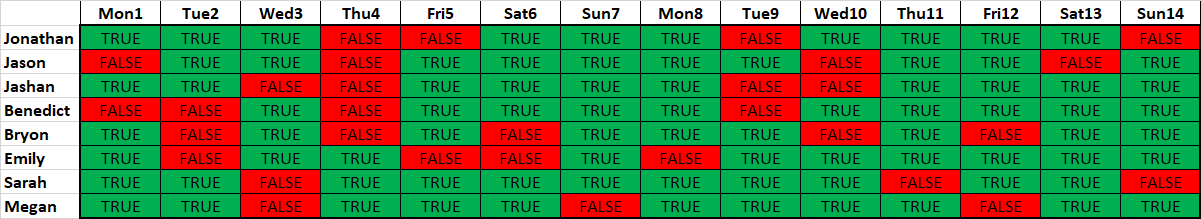

This excel spreadsheet can then be converted into the following tuplelist which defines their availability.

In [4]:
# Worker availability: defines on which day each employed worker is available.

availability = gp.tuplelist([
    ('Jonathan', 'Mon1'), ('Jonathan', 'Tue2'), ('Jonathan', 'Wed3'), ('Jonathan', 'Sat6'), ('Jonathan', 'Sun7'), 
    ('Jonathan', 'Mon8'), ('Jonathan', 'Wed10'), ('Jonathan', 'Fri12'), ('Jonathan', 'Sat13'), 
    
    ('Jason', 'Tue2'), ('Jason', 'Wed3'), ('Jason', 'Fri5'), ('Jason', 'Sat6'), 
    ('Jason', 'Mon8'), ('Jason', 'Tue9'), ('Jason', 'Thu11'), ('Jason', 'Fri12'), ('Jason', 'Sun14'), 
    
    ('Jashan', 'Mon1'), ('Jashan', 'Tue2'), ('Jashan', 'Fri5'), ('Jashan', 'Sun7'), 
    ('Jashan', 'Mon8'), ('Jashan', 'Thu11'), ('Jashan', 'Fri12'), ('Jashan', 'Sat13'), ('Jashan', 'Sun14'), 
    
    ('Benedict', 'Wed3'), ('Benedict', 'Fri5'), ('Benedict', 'Sat6'), ('Benedict', 'Sun7'),
    ('Benedict', 'Mon8'), ('Benedict', 'Wed10'), ('Benedict', 'Thu11'), ('Benedict', 'Fri12'), ('Benedict', 'Sat13'), 
    
    ('Bryon', 'Mon1'), ('Bryon', 'Wed3'), ('Bryon', 'Fri5'), ('Bryon', 'Sun7'), 
    ('Bryon', 'Mon8'), ('Bryon', 'Tue9'), ('Bryon', 'Thu11'), ('Bryon', 'Sat13'), ('Bryon', 'Sun14'), 
    
    ('Emily', 'Wed3'), ('Emily', 'Thu4'), ('Emily', 'Fri5'), ('Emily', 'Sat6'), ('Emily', 'Sun7'),
    ('Emily', 'Wed10'), ('Emily', 'Thu11'), ('Emily', 'Fri12'), ('Emily', 'Sun14'),
    
    ('Sarah', 'Mon1'), ('Sarah', 'Wed3'), ('Sarah', 'Thu4'), ('Sarah', 'Sun7'), 
    ('Sarah', 'Tue9'), ('Sarah', 'Wed10'), ('Sarah', 'Fri12'), ('Sarah', 'Sat13'), ('Sarah', 'Sun14'),
    
    ('Megan', 'Mon1'), ('Megan', 'Tue2'), ('Megan', 'Thu4'), ('Megan', 'Fri5'), ('Megan', 'Sat6'),
    ('Megan', 'Mon8'), ('Megan', 'Tue9'), ('Megan', 'Wed10'), ('Megan', 'Fri12'), ('Megan', 'Sat13'),
])

<a id="section-four"></a>
# 4. OPTIMIZATION MODEL

<a id="subsection-four-one"></a>
## 4.1 Creating Initial Model

In [5]:
# Create initial model.
m = gp.Model("workforce_scheduling")

Using license file C:\Users\Bryon Liew\gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-09


<a id="subsection-four-two"></a>
## 4.2 Including Decision Variables

### Decision Variables

$x(w,s) \in \{0,1\}$: This variable equals 1 if worker $w \in workers$ is assigned to shift $s \in \text{shifts}$, 
and 0 otherwise.
This decision variable is defined over the $availability$ set.

In [6]:
# Initialize assignment decision variables.

x = m.addVars(availability, vtype=GRB.BINARY, name="x")

$Slack(s) \geq 0$: This variable is the number of extra workers required to satisfy the requirements of shift $s$.

In [7]:
# Slack decision variables determines the number of extra workers required to satisfy the demand requirements of each shift
slacks = m.addVars(shifts, name="Slack")

### Auxiliary Variables
Auxiliary variables are derived from the values of the decision variables.

$totSlack$: This variable counts the total number of extra workers required to satisfy the demand for shift workers.

In [8]:
# Auxiliary variable totSlack represents the total number of extra workers required to satisfy all shifts demand requirements.
totSlack = m.addVar(name='totSlack')

$\text{totShifts}(w)$: This variable counts the total number of shifts worked by each employed worker $w \in workers$.

$\text{minShift}$: This variable determines the minimum number of shifts allocated to allocated to employed workers. 

$\text{maxShift}$: This variable  determines the maximum number of shifts allocated to allocated to employed workers.

In [9]:
# Auxiliary variable totShifts counts the total shifts worked by each employed worker
totShifts = m.addVars(workers, name="TotShifts")

<a id="subsection-four-three"></a>
## 4.3 Adding Constraints

$$\sum_{w \: \in \: workers} x(w,s) \; + \; Slack(s) \; = \; \text{shiftRequirements}(s) \; \; \; \forall \; s \in shifts $$

In [10]:
# Constraint: All shifts requirements must be satisfied.

shift_reqmts = m.addConstrs((x.sum('*',s) + slacks[s] == shiftRequirements[s] for s in shifts), name='shiftRequirement')

$$ \sum_{s \: \in \: shifts} Slack(s) \; = \; totSlack  $$

In [11]:
# Constraint: set the auxiliary variable totSlack equal to the total number of extra workers required to satisfy shift requirements
 
num_temps = m.addConstr(totSlack == slacks.sum(), name='totSlack')

$$\sum_{s \: \in \: shifts} x(w,s) \; = \; \text{totShifts}(w) \; \; \forall \ w \; in \; workers$$

In [12]:
# Constraint: compute the total number of shifts for each worker

num_shifts = m.addConstrs((totShifts[w] == x.sum(w,'*') for w in workers), name='totShifts')

The variable $\text{minShift}$ determines the minimum numbers of shifts allocated to workers. This variable is calculated as:
$\text{minShift} = Min \{\text{totShifts}(w): \ w \; in \; workers \} $

The variable $\text{maxShift}$ determines the maximum numbers of shifts allocated to workers. This variable is calculated as:
$\text{maxShift} = Max \{\text{totShifts}(w): \ w \; in \; workers \} $

The addGenConstrMin() method of model object m adds a general constraint which determines the minimum value among a set of variables. The first argument 'minShift' is the variable whose value will be equal to the minimum of the other variables. The second argument 'totShifts is the set of variables over which the minimum will be taken. 
Recall that the totShifts variable is defined over the set of worker and determines the number of shifts that an employed worker will work. The third argument is the name of this constraint being added.

Similarly, the addGenConstrMax() method of the model object m adds a new general constraint that determines the maximum value among a set of variables.

In [13]:
# minShift is the minimum number of shifts allocated to workers 
# maxShift is the maximum number of shifts allocated to workers

minShift = m.addVar(name='minShift')
maxShift = m.addVar(name='maxShift')

min_constr = m.addGenConstrMin(minShift, totShifts, name='minShift')
max_constr = m.addGenConstrMax(maxShift, totShifts, name='maxShift')

<a id="subsection-four-four"></a>
## 4.4 Defining Objective Functions

### Primary objective
The setObjectiveN() method of the model object m allows us to define multiple objectives. 
- The first argument is the linear expression defining the most important objective, called primary objective, in this case it is the minimization of extra workers required to satisfy the shift requirements of IKEA. 
- The second argument is the index of the objective function, we set the index of the primary objective to be equal to 0.  
- The third argument is the priority of the objective. 
- The fourth argument is the relative tolerance to degrade this objective when a lower priority  objective is optimized. 
- The fifth argument is the name of this objective.

A hierarchical or lexicographic approach assigns a priority to each objective, and optimizes for the objectives in decreasing priority order. For this problem, we have two objectives, and the primary objective has the highest priority which is equal to 2. When the secondary objective is minimized, since the relative tolerance is 0.2, we can only increase the minimum number of extra workers by up to 20%. For example, if the minimum number extra workers is 10, then when optimizing the secondary objective we can have up to 12 extra workers.

In [14]:
# Primary Objective
m.setObjectiveN(totSlack, index=0, priority=2, reltol=0.2, name='TotalSlack')

### Secondary objective

The secondary objective is called fairness and its goal is to balance the workload assigned to the employed workers by IKEA. To balance the workload assigned to the employed workers, we can minimize the difference between the maximum number of shifts assigned to an employed worker and the minimum number of shifts assigned to an employed worker.

In [15]:
# Secondary Objective
m.setObjectiveN(maxShift - minShift, index=1, priority=1, name='Fairness')

Since we have a primary and a secondary objective which both aim to minimize, we set a global sense for both ojectives which within model object m to be minimized.

In [16]:
# Set global sense for all objectives.
m.ModelSense = GRB.MINIMIZE

<a id="subsection-four-five"></a>
## 4.5 Running Optimization Engine

With all of the required sets, parameters, decision variables, constraints and objective functions of the optimization model defined, we can now run the optimization engine to achieve an optimal scheduling of employed workers and optimal number of extra workers to be employed

In [17]:
# Run the optimization engine to solve the mixed-integer-programming problem in model object m
m.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 23 rows, 98 columns and 183 nonzeros
Model fingerprint: 0x0089fcc4
Model has 2 general constraints
Variable types: 25 continuous, 73 integer (73 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 8e+00]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve added 7 rows and 21 columns
Presolve time: 0.00s
Presolved: 30 rows and 119 columns
---------------------------------------------------------------------------

Multi-objectives: op

<a id="subsection-four-six"></a>
## 4.6 Running Checks on Optimization Engine

The .Status attribute indicates the current optimization status of the model object m. For this workforce model, we first check if the model is infeasible or unbounded and provide a report in the event of such a situation.

We then run a check for the optimization status of the model to observe if it is not optimal for some other reason.

In [18]:
# Check for if the model is infeasible or unbounded
status = m.Status
if status == GRB.Status.INF_OR_UNBD or status == GRB.Status.INFEASIBLE  or status == GRB.Status.UNBOUNDED:
    print('The model cannot be solved because it is infeasible or unbounded')
    sys.exit(0)
    
# Check for if the optimization status of the model is not optimal
if status != GRB.Status.OPTIMAL:
    print('Optimization was stopped with status ' + str(status))
    sys.exit(0)

<a id="section-five"></a>
# 5. PROBLEM SOLUTION VISUALIZATION

<a id="subsection-five-one"></a>
## 5.1 Slack Required in Optimal Solution

### Daily Slack

In [19]:
slacks

{'Mon1': <gurobi.Var Slack[Mon1] (value 0.0)>,
 'Tue2': <gurobi.Var Slack[Tue2] (value 0.0)>,
 'Wed3': <gurobi.Var Slack[Wed3] (value 0.0)>,
 'Thu4': <gurobi.Var Slack[Thu4] (value 0.0)>,
 'Fri5': <gurobi.Var Slack[Fri5] (value 0.0)>,
 'Sat6': <gurobi.Var Slack[Sat6] (value 2.0)>,
 'Sun7': <gurobi.Var Slack[Sun7] (value 2.0)>,
 'Mon8': <gurobi.Var Slack[Mon8] (value 0.0)>,
 'Tue9': <gurobi.Var Slack[Tue9] (value 0.0)>,
 'Wed10': <gurobi.Var Slack[Wed10] (value 0.0)>,
 'Thu11': <gurobi.Var Slack[Thu11] (value 0.0)>,
 'Fri12': <gurobi.Var Slack[Fri12] (value 0.0)>,
 'Sat13': <gurobi.Var Slack[Sat13] (value 2.0)>,
 'Sun14': <gurobi.Var Slack[Sun14] (value 3.0)>}

Extra workers are indicated by the slacks for each day.

Two extra workers are required on the first Saturday and Sunday.

Two extra workers are required on the second Saturday and three extra workers on the second Sunday.

### Total Slack

These add up to a total slack of 9 extra workers required

In [20]:
solution = {}
solution['Total slack required'] = str(totSlack.X)

print('The total slack required for this 2-week schedule is {} extra workers'.format(solution.get('Total slack required')))

The total slack required for this 2-week schedule is 9.0 extra workers


<a id="subsection-five-two"></a>
## 5.2 Number of Shifts Worked for Each Worker

Shifts
     Worker  Number of shifts
0  Jonathan               9.0
1     Jason               9.0
2    Jashan               8.0
3  Benedict               9.0
4     Bryon               8.0
5     Emily               8.0
6     Sarah               8.0
7     Megan               9.0


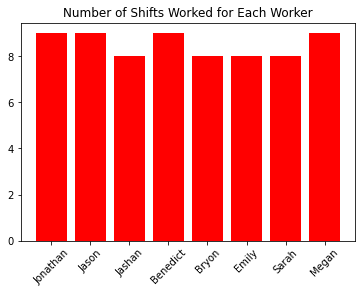

In [21]:
shifts_solution = {}
all_assignments = {}


assignments = dict()
for [w, s] in availability:
    if x[w, s].x == 1:
        if w in assignments:
            assignments[w].append(s)
        else:
            assignments[w] = [s]

for w in workers:
    shifts_solution[w]=totShifts[w].X
    all_assignments[w]=assignments.get(w, [])

print('Shifts')
print(pd.DataFrame.from_records(list(shifts_solution.items()), columns=['Worker', 'Number of shifts']))

y_pos = np.arange(len(shifts_solution.keys())) 
plt.bar(y_pos,shifts_solution.values() , align='center', color = 'red')
plt.xticks(y_pos, shifts_solution.keys(), rotation = 45)
plt.title('Number of Shifts Worked for Each Worker')
plt.show()

<a id="subsection-five-three"></a>
## 5.3 Gantt Chart of Optimal Work Plan Schedule

In [22]:
# demand and the number of shifts that each employed worker is working.
gant_chart={}

for w in all_assignments:
    gant_chart[w] = [w]
    for d in shifts:
        gant_chart[w].append('x' if d in all_assignments[w] else '-')

print('Assignments Schedule')
print('Symbols: \'-\': not working, \'x\': working')
pd.set_option('display.width', 1000)
pd.DataFrame.from_records(list(gant_chart.values()), columns=['worker']+shifts, index='worker')

Assignments Schedule
Symbols: '-': not working, 'x': working


,Mon1,Tue2,Wed3,Thu4,Fri5,Sat6,Sun7,Mon8,Tue9,Wed10,Thu11,Fri12,Sat13,Sun14
worker,,,,,,,,,,,,,,
Jonathan,x,x,x,-,-,x,x,x,-,x,-,x,x,-
Jason,-,x,x,-,x,x,-,x,x,-,x,x,-,x
Jashan,x,x,-,-,x,-,x,-,-,-,x,x,x,x
Benedict,-,-,x,-,x,x,x,x,-,x,x,x,x,-
Bryon,x,-,x,-,x,-,x,-,x,-,x,-,x,x
Emily,-,-,x,x,x,x,x,-,-,-,x,x,-,x
Sarah,x,-,-,x,-,-,x,-,x,x,-,x,x,x
Megan,x,x,-,x,x,x,-,x,-,x,-,x,x,-


<a id="subsection-five-three"></a>
## 5.4 Computing Total Pay of Each Worker

In [23]:
df_shifts = pd.DataFrame.from_records(list(shifts_solution.items()), columns=['Worker', 'Number of shifts'], index='Worker')
df_pay = pd.DataFrame.from_dict(pay, orient='index', columns = ['Pay'])
df = df_shifts.merge(df_pay, left_index=True, right_index=True)
df['Total Pay'] = df['Number of shifts']*df['Pay']
df

,Number of shifts,Pay,Total Pay
Jonathan,9.0,95,855.0
Jason,9.0,100,900.0
Jashan,8.0,90,720.0
Benedict,9.0,100,900.0
Bryon,8.0,85,680.0
Emily,8.0,110,880.0
Sarah,8.0,90,720.0
Megan,9.0,80,720.0


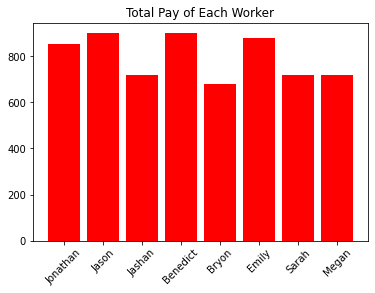

In [24]:
plt.bar(y_pos,df['Total Pay'] , align='center', color = 'red')
plt.xticks(y_pos, df['Total Pay'].index, rotation = 45)
plt.title('Total Pay of Each Worker')
plt.show()

<a id="section-six"></a>
# 6. ANALYSIS OF WORKFORCE SCHEDULING PROBLEM

The total number of extra workers that IKEA is required to contract to satisfy the shift requirements during the two-week planning horizon is nine. This value is minimized so as to reduce the cost required from IKEA to employe extra workers from an external agency.

The bar chart titled 'Number of Shifts Worked for Each Worker' shows the number of shifts that each employed worker will work during the two-week planning horizon. It is observed that with nine extra workers being contracted, the workload of employed workers is quite balanced with each worker working eight or nine shifts. This is important as workers in this industry are paid per shift and it would be unfair to allocate more or less shifts to any worker. 

The gantt chart 'Assignment Schedule' above shows which days during the two-week planning horizon each employed worker is working. This will aid the company in automating the optimal scheduling of their workforce. Every two weeks, the employed workers of IKEA will submit their availability to their human resource manager through the excel file, which will then be used to update the optimization engine to output the schedule for the following two weeks.

Finally, the bar chart titled 'Total Pay of Each Worker' shows the forecasted pay that IKEA will have to pay to their workers for the two-week planning horizon. This will help in automating the salary disbursement at the end of the two weeks assuming that each worker fulfills their assignment.

<a id="section-seven"></a>
# 7. CONCLUSION

In this project, I discussed a workforce scheduling optimization problem for IKEA's service staff and developed a workforce plan for the next two weeks. There is only one shift per workday, with each shift possibly having requirements for differing workers on each workday. IKEA may hire extra workers from an external agency to satisfy shift requirements. 

The goal of this model is to minimize the number of extra workers that needs to hire, this is to reduce the costs of hiring to IKEA as extra workers cost more to contract as compared to paying employed workers. For the secondary objective, IKEA wants to balance the workload of employed workers. This is important as workers will be upset if they are unfairly allocated less or more shifts than other workers.

This problem was formulated as a multi-objective mixed-integer-programming (MIP) model, and implemented using the Gurobi Python API and solved using the Gurobi Optimizer.

<a id="section-eight"></a>
# 8. REFERENCES

[1] Gurobi Optimization, LLC. Workforce Scheduling Problem. Retrieved 18 November 2020 from: https://gurobi.github.io/modeling-examples/workforce/workforce_scheduling.html